[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Nepal-College-of-Information-Technology/AI-Data-Science-Workshop-2024/blob/main/Day%2011%3A%20Model%20Evaluation%20and%20Hyperparameter%20Tuning/Part1_Model_Evaluation_and_Metrics.ipynb)


# Part 1: Model Evaluation and Metrics

In this notebook, we will explore how to evaluate machine learning models using performance metrics such as accuracy, precision, recall, and F1-score. We will also learn how to interpret a **confusion matrix** and why it is important for classification tasks.

---

## Step 1: Import Libraries and Load Dataset

We will use the **breast cancer dataset** from `sklearn.datasets`, a binary classification dataset, to evaluate a simple model.

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset (binary classification)
data = load_breast_cancer()
X = data['data']
y = data['target']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the dataset description
print(data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

---

## Step 2: Train a Simple Model

We will use a **RandomForestClassifier** to train a model on the training data. After training, we will evaluate the model on the test set.

In [2]:
# Train a RandomForest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Print the classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Confusion Matrix:
[[40  3]
 [ 1 70]]


---

## Step 3: Understanding the Confusion Matrix

A **confusion matrix** is used to evaluate the performance of a classification model by comparing the predicted labels with the actual labels. It consists of four components:

1. **True Positives (TP)**: Correctly predicted positive observations.
2. **True Negatives (TN)**: Correctly predicted negative observations.
3. **False Positives (FP)**: Incorrectly predicted positive observations (also known as Type I error).
4. **False Negatives (FN)**: Incorrectly predicted negative observations (also known as Type II error).

The confusion matrix is usually displayed in the following format:

|                | Predicted Positive | Predicted Negative |
|----------------|-------------------|-------------------|
| **Actual Positive** | True Positive (TP) | False Negative (FN) |
| **Actual Negative** | False Positive (FP) | True Negative (TN) |

### Real-world Example:
If you are building a spam classifier:
- **True Positive (TP)**: Correctly predicted a spam email as spam.
- **False Positive (FP)**: Incorrectly predicted a non-spam email as spam.
- **True Negative (TN)**: Correctly predicted a non-spam email as non-spam.
- **False Negative (FN)**: Incorrectly predicted a spam email as non-spam.

---

## Step 4: Model Evaluation Metrics

### 1. **Accuracy**:
Accuracy is the percentage of correct predictions:

$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

### 2. **Precision**:
Precision is the percentage of correctly predicted positive observations out of all predicted positives:
$$ Precision = \frac{TP}{TP + FP} $$

### 3. **Recall**:
Recall (also known as Sensitivity) is the percentage of correctly predicted positive observations out of all actual positives:
$$ Recall = \frac{TP}{TP + FN} $$

### 4. **F1 Score**:
The F1 score is the harmonic mean of precision and recall:
$$ F1 Score = 2 \times \frac{Precision \times Recall}{Precision + Recall} $$

These metrics help us understand how well our model is performing in different scenarios, especially in cases where the data is imbalanced.

---

## Step 5: Evaluate the Model using Cross-Validation

Now, let's use **cross-validation** to evaluate the model more reliably by splitting the dataset multiple times.

In [3]:
from sklearn.model_selection import cross_val_score

# Use cross-validation to evaluate the model
cv_scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean()}")

Cross-Validation Accuracy Scores: [0.92105263 0.93859649 0.98245614 0.96491228 0.97345133]
Mean Accuracy: 0.9560937742586555


---
### Comparing the model performance
#### Before and After the cross validation

In [7]:
# Train a RandomForest model before cross-validation
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

accuracy_before_cv = model.score(X_test, y_test)
print(f"Accuracy Before Cross-Validation: {accuracy_before_cv:.4f}")

Accuracy Before Cross-Validation: 0.9649


In [8]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(model, X, y, cv=5)

# Print the cross-validation accuracy for each fold
print(f"Cross-Validation Accuracy for each fold: {cv_scores}")

# Calculate the mean accuracy after cross-validation
accuracy_after_cv = cv_scores.mean()
print(f"Mean Accuracy After Cross-Validation: {accuracy_after_cv:.4f}")

Cross-Validation Accuracy for each fold: [0.92105263 0.93859649 0.98245614 0.96491228 0.97345133]
Mean Accuracy After Cross-Validation: 0.9561


In [9]:
print(f"Accuracy Before Cross-Validation: {accuracy_before_cv:.4f}")
print(f"Mean Accuracy After Cross-Validation: {accuracy_after_cv:.4f}")

if accuracy_before_cv > accuracy_after_cv:
    print("The model performed better before cross-validation, indicating potential overfitting.")
else:
    print("The model performed better or more consistently after cross-validation, indicating improved generalization.")

Accuracy Before Cross-Validation: 0.9649
Mean Accuracy After Cross-Validation: 0.9561
The model performed better before cross-validation, indicating potential overfitting.


### The ROC (Receiver Operating Characteristic) curve

To compare the model performance before and after cross-validation using the ROC (Receiver Operating Characteristic) curve, we can plot the ROC curve for both cases. The ROC curve is a plot that shows the true positive rate (TPR) against the false positive rate (FPR) at various threshold levels, and the AUC (Area Under the Curve) score can help summarize the performance.

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_predict

# Import additional libraries for ROC curve and AUC
from sklearn.metrics import roc_auc_score

In [11]:
# Predict probabilities for the test set
y_pred_proba_before_cv = model.predict_proba(X_test)[:, 1]

# Calculate FPR, TPR, and thresholds for ROC curve
fpr_before_cv, tpr_before_cv, thresholds_before_cv = roc_curve(y_test, y_pred_proba_before_cv)

# Calculate the AUC score
auc_before_cv = auc(fpr_before_cv, tpr_before_cv)
print(f"AUC Before Cross-Validation: {auc_before_cv:.4f}")

AUC Before Cross-Validation: 0.9953


In [12]:
# Use cross_val_predict to get predicted probabilities from cross-validation
y_pred_proba_after_cv = cross_val_predict(model, X, y, cv=5, method='predict_proba')[:, 1]

# Calculate FPR, TPR, and thresholds for ROC curve
fpr_after_cv, tpr_after_cv, thresholds_after_cv = roc_curve(y, y_pred_proba_after_cv)

# Calculate the AUC score
auc_after_cv = auc(fpr_after_cv, tpr_after_cv)
print(f"AUC After Cross-Validation: {auc_after_cv:.4f}")

AUC After Cross-Validation: 0.9912


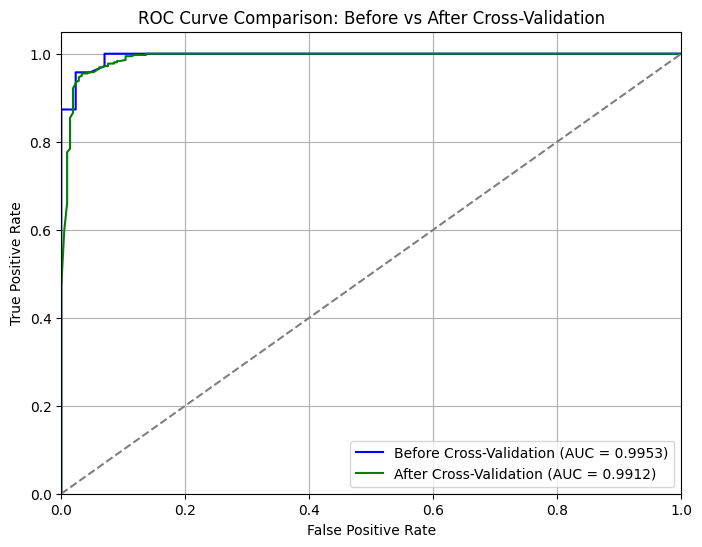

In [13]:
# Plot the ROC curves
plt.figure(figsize=(8, 6))

# ROC curve for before cross-validation
plt.plot(fpr_before_cv, tpr_before_cv, color='blue', label=f'Before Cross-Validation (AUC = {auc_before_cv:.4f})')

# ROC curve for after cross-validation
plt.plot(fpr_after_cv, tpr_after_cv, color='green', label=f'After Cross-Validation (AUC = {auc_after_cv:.4f})')

# Plot settings
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison: Before vs After Cross-Validation')
plt.legend(loc="lower right")
plt.grid()

# Show the plot
plt.show()

#### Why is the Model Performing Better Before Cross-Validation?

1.	Overfitting on the Train-Test Split:
- The model may be overfitting to the training set in the original train-test split. This means the model is capturing noise or irrelevant patterns in the training data, leading to higher accuracy or AUC on that specific test set.
- However, this “better” performance is often misleading because it doesn’t reflect the model’s ability to generalize to unseen data.
2.	Cross-Validation Performance:
- Cross-validation provides a more robust estimate of the model’s performance by testing it on multiple different subsets of the data. If the performance after cross-validation is lower, it suggests the model was overfitting to the initial training set and doesn’t generalize as well across different splits of the data.
- Cross-validation helps reveal how well the model is expected to perform in practice, especially on unseen data.


---

### Conclusion

In this notebook, we learned how to evaluate a model using a **confusion matrix** and important metrics such as **accuracy**, **precision**, **recall**, and **F1-score**. We also performed **cross-validation** to get a more reliable evaluation of the model's performance.

While it may seem that the model performed better before cross-validation, the true generalization performance of the model is better represented after cross-validation. This is because cross-validation prevents overfitting by evaluating the model on multiple splits of the data. The goal should be to optimize the model to perform well across all data, not just a single test set.

In the next notebook, we will perform **hyperparameter tuning** to optimize the model and improve its performance.